In [4]:
#Import All Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
dataset = pd.read_excel(r"Data_Train.xlsx")
dataset.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [6]:
dataset.shape

(10683, 11)

In [7]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [8]:
dataset.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [71]:
print(dataset["Airline"].unique())
print(dataset["Source"].unique())
print(dataset["Destination"].unique())
print(dataset["Total_Stops"].unique())

['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']
['non-stop' '2 stops' '1 stop' '3 stops' nan '4 stops']


In [10]:
dataset.isnull().sum().sum()

2

In [11]:
df = dataset.dropna()

In [12]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [13]:
cat_var = df.select_dtypes(include=["object"]).columns
cat_var

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

c:\users\nikhatara\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Airline', ylabel='count'>

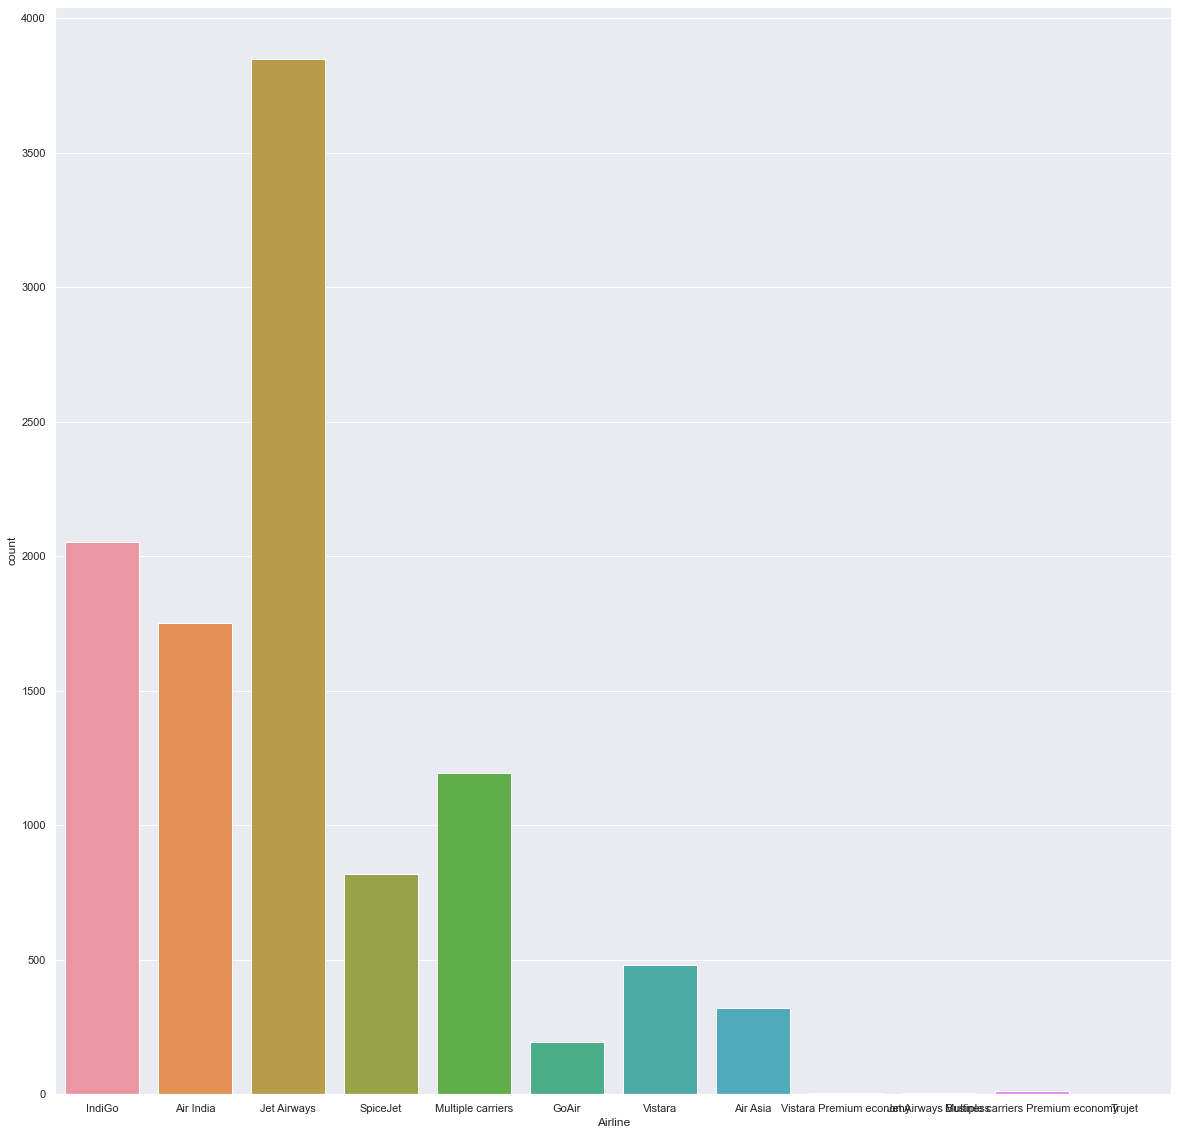

In [14]:
plt.figure(figsize=(20,20))
sns.set()
sns.countplot(df["Airline"])

c:\users\nikhatara\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Source', ylabel='count'>

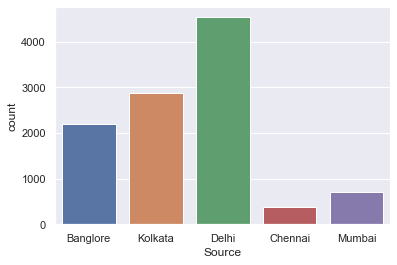

In [15]:
sns.countplot(df["Source"])

c:\users\nikhatara\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Destination', ylabel='count'>

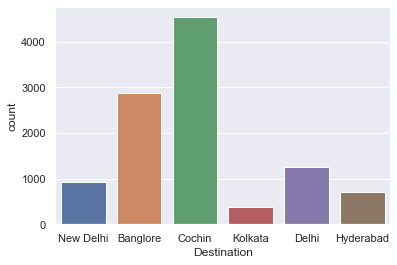

In [16]:
sns.countplot(df["Destination"])

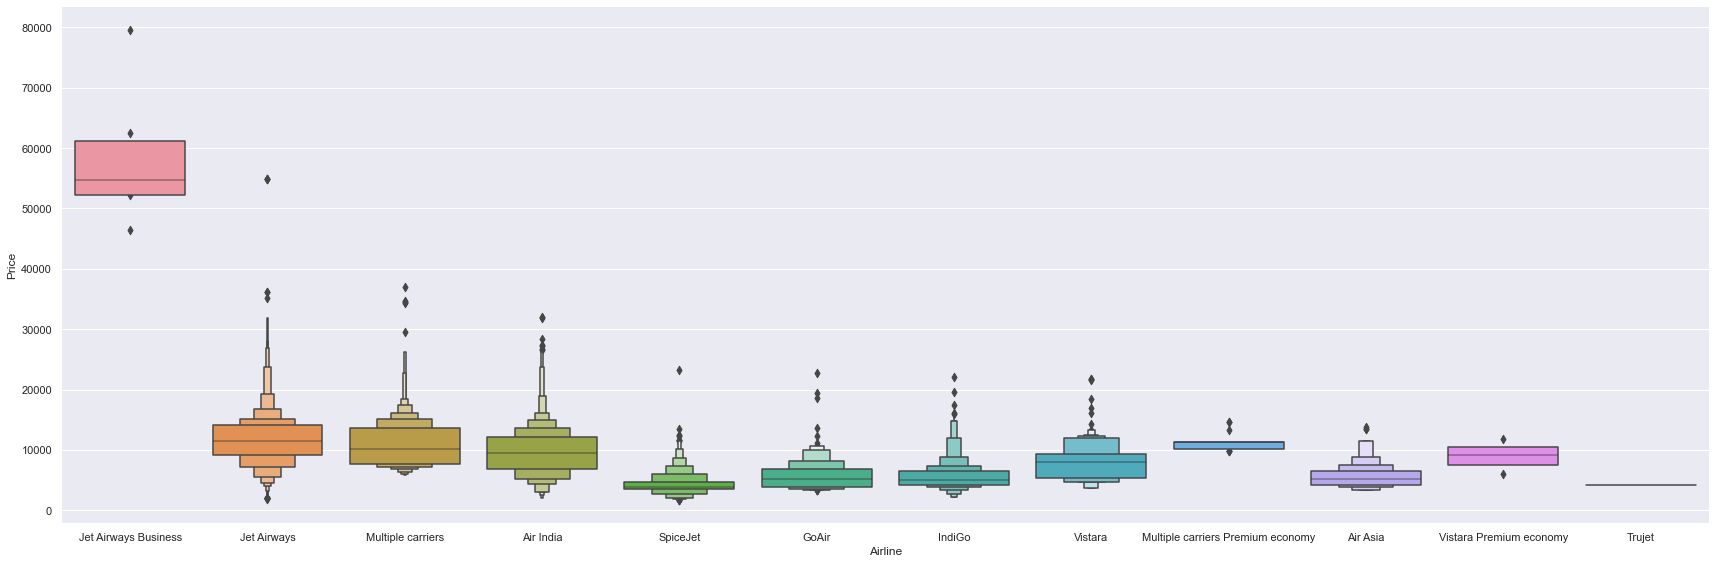

In [17]:
sns.catplot(y = "Price", x = "Airline", data = df.sort_values("Price", ascending = False), kind="boxen", height = 8, aspect = 3)
plt.show()

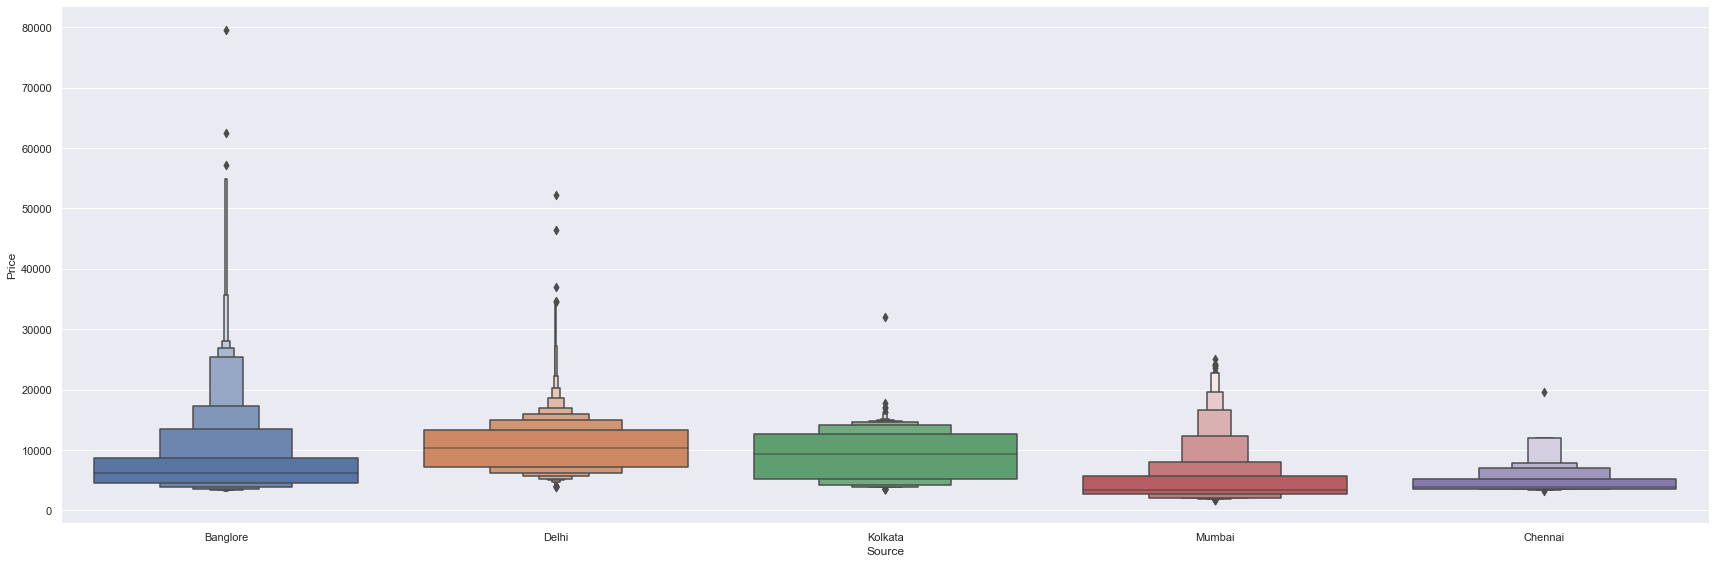

In [18]:
sns.catplot(y = "Price", x = "Source", data = df.sort_values("Price", ascending = False), kind="boxen", height = 8, aspect = 3)
plt.show()

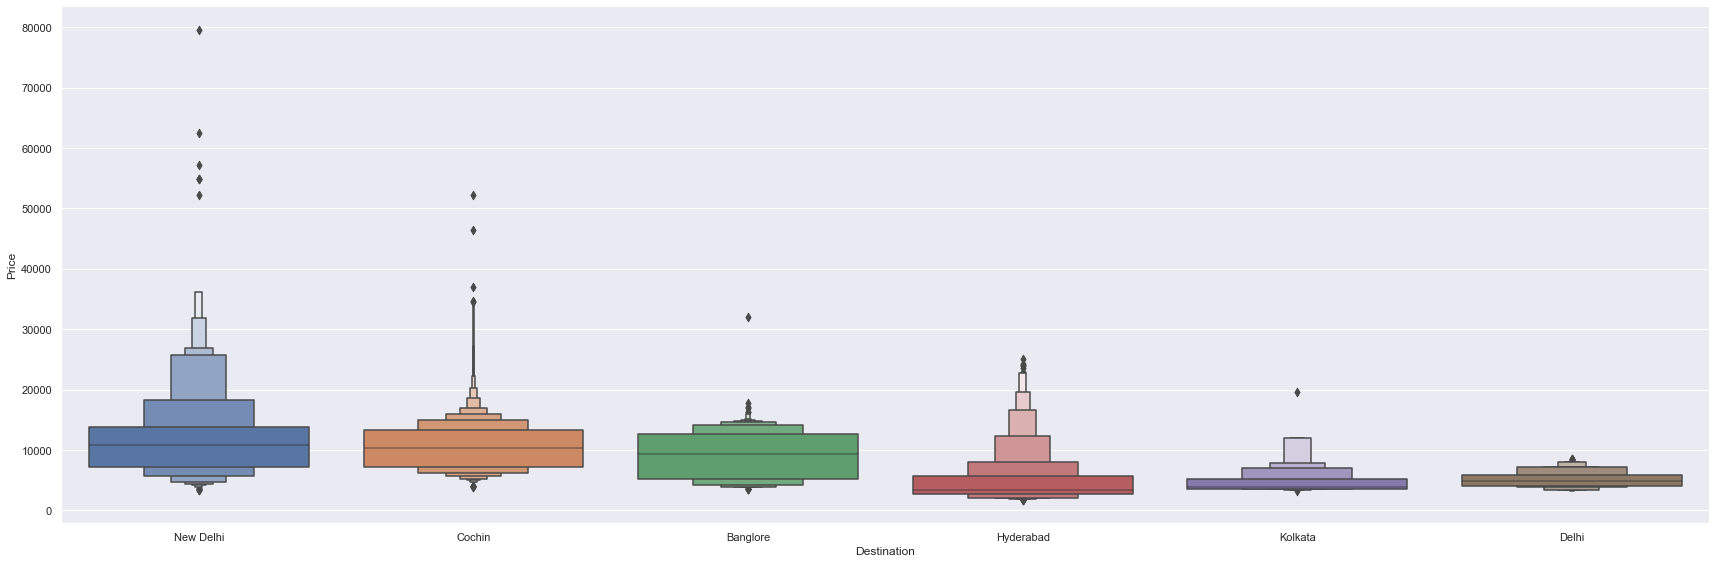

In [19]:
sns.catplot(y = "Price", x = "Destination", data = df.sort_values("Price", ascending = False), kind="boxen", height = 8, aspect = 3)
plt.show()

In [20]:
Airline = df[["Airline"]].value_counts()
Airline = pd.get_dummies(df.Airline, drop_first=True)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [21]:
Source = df[["Source"]].value_counts()
Source = pd.get_dummies(df.Source, drop_first=True)
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [22]:
Destination = df[["Destination"]].value_counts()
Destination = pd.get_dummies(df.Destination, drop_first=True)
Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [23]:
df.replace({'non-stop':0,'2 stops':2, '1 stop':1,'3 stops':3,'4 stops':4},inplace=True)

c:\users\nikhatara\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:5233: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [24]:
df = pd.concat([df,Destination,Source,Airline],axis=1)
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Chennai,Delhi,Kolkata,Mumbai,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [25]:
df2 = df.drop(columns=["Destination","Source","Airline","Duration","Additional_Info","Route"],axis=1) 
df2.head()

,Date_of_Journey,Dep_Time,Arrival_Time,Total_Stops,Price,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Chennai,Delhi,Kolkata,Mumbai,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,24/03/2019,22:20,01:10 22 Mar,0,3897,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,1/05/2019,05:50,13:15,2,7662,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
2,9/06/2019,09:25,04:25 10 Jun,2,13882,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
3,12/05/2019,18:05,23:30,1,6218,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
4,01/03/2019,16:50,21:35,1,13302,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [26]:
#convert Date and Time
df2["Journey_day"] = pd.to_datetime(df2.Date_of_Journey, format="%d/%m/%Y").dt.day
df2["Journey_month"] = pd.to_datetime(df2["Date_of_Journey"], format = "%d/%m/%Y").dt.month
df2["Dep_hour"] = pd.to_datetime(df2["Dep_Time"]).dt.hour
df2["Dep_min"] = pd.to_datetime(df2["Dep_Time"]).dt.minute
df2["Arrival_hour"] = pd.to_datetime(df2.Arrival_Time).dt.hour
df2["Arrival_min"] = pd.to_datetime(df2.Arrival_Time).dt.minute

C:\Users\NIKHAT~1\AppData\Local\Temp/ipykernel_6468/217884546.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Journey_day"] = pd.to_datetime(df2.Date_of_Journey, format="%d/%m/%Y").dt.day
C:\Users\NIKHAT~1\AppData\Local\Temp/ipykernel_6468/217884546.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Journey_month"] = pd.to_datetime(df2["Date_of_Journey"], format = "%d/%m/%Y").dt.month
C:\Users\NIKHAT~1\AppData\Local\Temp/ipykernel_6468/217884546.py:4: SettingWithCopyWarning: 
A value is tryin

In [27]:
df2.head()

,Date_of_Journey,Dep_Time,Arrival_Time,Total_Stops,Price,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Chennai,Delhi,Kolkata,Mumbai,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,24/03/2019,22:20,01:10 22 Mar,0,3897,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,24,3,22,20,1,10
1,1/05/2019,05:50,13:15,2,7662,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,5,5,50,13,15
2,9/06/2019,09:25,04:25 10 Jun,2,13882,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,9,6,9,25,4,25
3,12/05/2019,18:05,23:30,1,6218,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,12,5,18,5,23,30
4,01/03/2019,16:50,21:35,1,13302,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,3,16,50,21,35


In [70]:
df3 = df2.drop(columns=["Date_of_Journey","Dep_Time","Arrival_Time"],axis=1) 
df3.head()

,Total_Stops,Price,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Chennai,Delhi,Kolkata,Mumbai,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,0,3897,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,24,3,22,20,1,10
1,2,7662,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,5,5,50,13,15
2,2,13882,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,9,6,9,25,4,25
3,1,6218,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,12,5,18,5,23,30
4,1,13302,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,3,16,50,21,35


In [29]:
df3.shape

(10682, 28)

# TEST Data


In [32]:
test_data = pd.read_excel(r"Test_set.xlsx")
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [31]:
test_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [33]:
Airline = df[["Airline"]].value_counts()
Airline = pd.get_dummies(test_data.Airline, drop_first=True)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


In [34]:
Source = df[["Source"]].value_counts()
Source = pd.get_dummies(test_data.Source, drop_first=True)
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,0,0,0,0


In [35]:
Destination = df[["Destination"]].value_counts()
Destination = pd.get_dummies(test_data.Destination, drop_first=True)
Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,0,0,0,0
1,0,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,0,1,0,0,0


In [36]:
test_data.replace({'non-stop':0,'2 stops':2, '1 stop':1,'3 stops':3,'4 stops':4},inplace=True)

In [37]:
test_data = pd.concat([test_data,Destination,Source,Airline],axis=1)
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Chennai,Delhi,Kolkata,Mumbai,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1,No info,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1,No info,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1,In-flight meal not included,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1,No info,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,0,No info,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [38]:
test_data1 = test_data.drop(columns=["Destination","Source","Airline","Duration","Additional_Info","Route"],axis=1) 
test_data1.head()

,Date_of_Journey,Dep_Time,Arrival_Time,Total_Stops,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Chennai,Delhi,Kolkata,Mumbai,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy
0,6/06/2019,17:30,04:25 07 Jun,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
1,12/05/2019,06:20,10:20,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
2,21/05/2019,19:15,19:00 22 May,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
3,21/05/2019,08:00,21:00,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
4,24/06/2019,23:55,02:45 25 Jun,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [40]:
#convert Date and Time
test_data1["Journey_day"] = pd.to_datetime(test_data1.Date_of_Journey, format="%d/%m/%Y").dt.day
test_data1["Journey_month"] = pd.to_datetime(test_data1["Date_of_Journey"], format = "%d/%m/%Y").dt.month
test_data1["Dep_hour"] = pd.to_datetime(test_data1["Dep_Time"]).dt.hour
test_data1["Dep_min"] = pd.to_datetime(test_data1["Dep_Time"]).dt.minute
test_data1["Arrival_hour"] = pd.to_datetime(test_data1.Arrival_Time).dt.hour
test_data1["Arrival_min"] = pd.to_datetime(test_data1.Arrival_Time).dt.minute

C:\Users\NIKHAT~1\AppData\Local\Temp/ipykernel_6468/3357320749.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data1["Journey_day"] = pd.to_datetime(test_data1.Date_of_Journey, format="%d/%m/%Y").dt.day
C:\Users\NIKHAT~1\AppData\Local\Temp/ipykernel_6468/3357320749.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data1["Journey_month"] = pd.to_datetime(test_data1["Date_of_Journey"], format = "%d/%m/%Y").dt.month
C:\Users\NIKHAT~1\AppData\Local\Temp/ipykernel_6468/3357320749.py:4: SettingWit

In [42]:
test_data1.head()

,Date_of_Journey,Dep_Time,Arrival_Time,Total_Stops,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Chennai,Delhi,Kolkata,Mumbai,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,6/06/2019,17:30,04:25 07 Jun,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,6,6,17,30,4,25
1,12/05/2019,06:20,10:20,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,12,5,6,20,10,20
2,21/05/2019,19:15,19:00 22 May,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,21,5,19,15,19,0
3,21/05/2019,08:00,21:00,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,21,5,8,0,21,0
4,24/06/2019,23:55,02:45 25 Jun,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,6,23,55,2,45


In [43]:
test_data2 = test_data1.drop(columns=["Date_of_Journey","Dep_Time","Arrival_Time"],axis=1) 
test_data2.head()

,Total_Stops,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Chennai,Delhi,Kolkata,Mumbai,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,6,6,17,30,4,25
1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,12,5,6,20,10,20
2,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,21,5,19,15,19,0
3,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,21,5,8,0,21,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,6,23,55,2,45


In [44]:
test_data2.shape

(2671, 26)

# Build Modeling

In [47]:
X = df3.drop(["Price"],axis=1)
y=df3["Price"]

In [73]:
X.head()

,Total_Stops,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Chennai,Delhi,Kolkata,Mumbai,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,24,3,22,20,1,10
1,2,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,5,5,50,13,15
2,2,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,9,6,9,25,4,25
3,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,12,5,18,5,23,30
4,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,3,16,50,21,35


In [48]:
# Important feature using ExtraTreesRegressor

from sklearn.tree import DecisionTreeRegressor
selection = DecisionTreeRegressor()
selection.fit(X, y)

DecisionTreeRegressor()

In [49]:
print(selection.feature_importances_)

[4.29760428e-01 4.32649655e-04 1.55045202e-04 5.48833738e-03
 3.57617016e-05 2.26943451e-02 1.26035155e-04 3.93124824e-03
 4.18163866e-03 5.17107071e-03 8.05238799e-03 4.07636601e-04
 4.26325672e-03 7.78994377e-02 6.49642115e-02 2.58026722e-02
 1.01155618e-03 1.09571953e-03 0.00000000e+00 4.43645577e-03
 2.47279063e-05 1.41112225e-01 5.02971308e-02 4.35773935e-02
 2.65688584e-02 4.91332658e-02 2.93765054e-02]


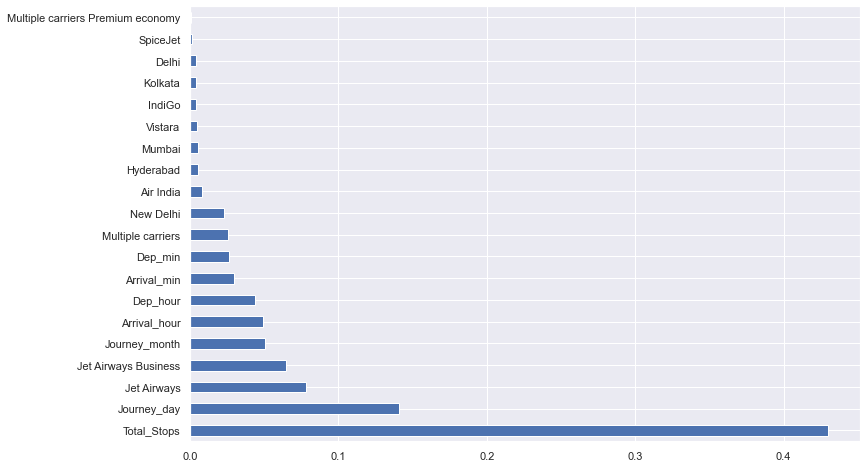

In [52]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [53]:
#Fitting Model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 51)

In [54]:
selection_dt = DecisionTreeRegressor()
selection_dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [58]:
selection_dt.score(X_train, y_train)

0.9706522686328483

In [59]:
selection_dt.score(X_test, y_test)

0.7122429882170274

In [60]:
y_pred=selection_dt.predict(X_test)

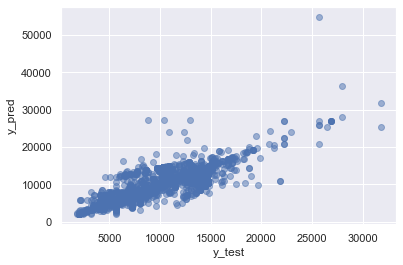

In [61]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

c:\users\nikhatara\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


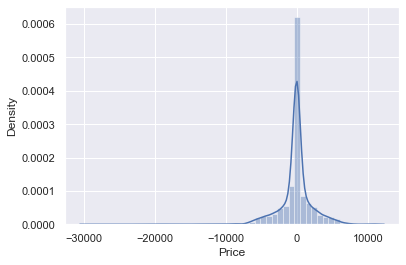

In [62]:
sns.distplot(y_test-y_pred)
plt.show()

In [63]:
y_pred=selection_dt.predict(X_test)
y_pred

array([10703., 16289.,  7480., ...,  9646.,  4804.,  5177.])

In [64]:
y_pred=selection_dt.predict(X_test[:1])
y_pred

array([10703.])

In [65]:
df3.iloc[:1]

,Total_Stops,Price,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Chennai,Delhi,Kolkata,Mumbai,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,0,3897,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,24,3,22,20,1,10


### Prediction value


In [66]:
y_pred=selection_dt.predict([[0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,24,3,22,20,1,10]])
y_pred

array([4377.])

### Save Model

In [67]:
import pickle
pickle.dump(selection_dt,open('flight_dt_new.pickle','wb'))

In [69]:
model = pickle.load(open('flight_dt_new.pickle','rb'))
y_pred1= model.predict(X_test)